Linear Classification and Logistic Regression.py

**step1--> import your classes and read your data**

In [394]:
import pandas as pd
import numpy as np

In [395]:
df = pd.read_csv('https://query.data.world/s/wh6j7rxy2hvrn4ml75ci62apk5hgae')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [396]:
df

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,1.402924e-01,1.995463e-01,0.097188051,3.688847e-02,2.931995e-02,0.000000e+00,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,4.830000e+05,6.870000e+05,334600,1.270000e+05,1.009430e+05,0.000000e+00,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,1.598044e-01,1.352610e-01,0.084003213,1.374213e-02,3.339780e-02,0.000000e+00,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,5.501762e+05,4.656780e+05,289207.1078,4.731155e+04,1.149823e+05,0.000000e+00,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,3.875102e-01,1.894622e-01,1.26E-06,4.164833e-03,3.339780e-02,1.114093e+00,1.728629e+00,3A
...,...,...,...,...,...,...,...,...,...,...,...,...
72181,World,2016,5001,BiocapTotGHA,3.984702e+09,1.504757e+09,5.11176e+09,1.095445e+09,4.726163e+08,0.000000e+00,1.216928e+10,3A
72182,World,2016,5001,EFConsPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A
72183,World,2016,5001,EFConsTotGHA,3.984702e+09,1.046937e+09,2.04218e+09,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10,3A
72184,World,2016,5001,EFProdPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A


**step2--> explore data and drop nan**

In [397]:
df.groupby('QScore')['country'].count()

QScore
1A       16
1B       16
2A    10576
2B    10096
3A    51481
Name: country, dtype: int64

In [398]:
df['country'].value_counts()

Gabon              448
Angola             448
Greece             448
Japan              448
Djibouti           448
                  ... 
Sudan               48
Montserrat           8
Belize               8
Solomon Islands      8
Cook Islands         8
Name: country, Length: 193, dtype: int64

In [399]:
new_df=df.groupby(['year','QScore'])['country'].sum().loc[1992]

In [400]:
new_df

QScore
2A    AlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlge...
2B    Antigua and BarbudaAntigua and BarbudaAntigua ...
3A    ArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArme...
Name: country, dtype: object

#check distribution of target variable

In [401]:
df['QScore'].value_counts()

3A    51481
2A    10576
2B    10096
1A       16
1B       16
Name: QScore, dtype: int64

In [402]:
df.isna().sum()

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
QScore                1
dtype: int64

In [403]:
#for simplicity, we will drop the rows with missing values.
df = df.dropna()


In [404]:
df.isna().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64

#An obvious change in our target variable after removing the missing values is that there are only three classes left #and from the distribution of the 3 classes, we can see that there is an obvious imbalance between the classes. #There are methods that can be applied to handle this imbalance such as oversampling and undersampling.
#Oversampling involves increasing the number of instances in the class with fewer instances while undersampling #involves reducing the data points in the class with more instances.
#For now, we will convert this to a binary classification problem by combining class '2A' and '1A'.

**step3--> check target variable for balance, if not carry out #Oversampling nd undersampling**

In [405]:
df['QScore'].value_counts()

3A    51473
2A      224
1A       16
Name: QScore, dtype: int64

In [406]:
df['QScore'] = df['QScore'].replace(['1A'], '2A')    #Oversampling

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [407]:
df.QScore.value_counts()

3A    51473
2A      240
Name: QScore, dtype: int64

In [408]:
df['QScore'].value_counts()

3A    51473
2A      240
Name: QScore, dtype: int64

In [409]:
df_2A = df[df.QScore=='2A']     #seprating dataframe with QScore=='2A' from QScore=='3A'

In [410]:
df_2A

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
1536,Algeria,2016,4,AreaPerCap,2.072989e-01,8.112722e-01,0.048357265,2.258528e-02,2.998367e-02,0.000000e+00,1.119497e+00,2A
1537,Algeria,2016,4,AreaTotHA,8.417600e+06,3.294260e+07,1963600,9.171000e+05,1.217520e+06,0.000000e+00,4.545842e+07,2A
1538,Algeria,2016,4,BiocapPerCap,2.021916e-01,2.636077e-01,0.027166736,7.947991e-03,2.924496e-02,0.000000e+00,5.301590e-01,2A
1539,Algeria,2016,4,BiocapTotGHA,8.210214e+06,1.070408e+07,1103135.245,3.227369e+05,1.187524e+06,0.000000e+00,2.152769e+07,2A
1540,Algeria,2016,4,EFConsPerCap,6.280528e-01,1.810332e-01,0.162800822,1.472910e-02,2.924496e-02,1.391455e+00,2.407316e+00,2A
...,...,...,...,...,...,...,...,...,...,...,...,...
65469,Ukraine,2016,230,BiocapTotGHA,8.966961e+07,6.457412e+06,19268322.04,6.920056e+06,3.952345e+06,0.000000e+00,1.262677e+08,2A
65470,Ukraine,2016,230,EFConsPerCap,1.155004e+00,1.081601e-02,0.149119494,5.150234e-02,8.893945e-02,1.453137e+00,2.908519e+00,2A
65471,Ukraine,2016,230,EFConsTotGHA,5.132678e+07,4.806484e+05,6626661.768,2.288692e+06,3.952345e+06,6.457538e+07,1.292505e+08,2A
65472,Ukraine,2016,230,EFProdPerCap,2.017831e+00,5.768143e-03,0.216720935,3.223480e-03,8.893945e-02,1.665767e+00,3.998251e+00,2A


In [411]:
df_3A = df[df.QScore=='3A'].sample(350)   #undersampling, seprating dataframe with QScore=='3A' from QScore=='2A'


In [412]:
df_3A

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
51649,Zimbabwe,1977,181,EFProdTotGHA,2.566866e+06,3.573056e+06,2107105.486,7.526496e+03,2.731006e+05,2.603161e+06,1.113082e+07,3A
53244,Rwanda,2009,184,BiocapPerCap,3.310813e-01,6.357064e-02,0.015117329,6.170454e-03,4.029151e-02,0.000000e+00,4.562313e-01,3A
5794,Bhutan,2008,18,BiocapPerCap,3.302761e-01,3.629017e-01,4.600420573,1.450244e-02,2.649167e-01,0.000000e+00,5.573018e+00,3A
71507,China,1988,351,AreaTotHA,1.291030e+08,3.651760e+08,1.57141e+08,1.352300e+08,2.563090e+07,0.000000e+00,8.122805e+08,3A
3891,Bahamas,2003,12,BiocapTotGHA,1.196271e+04,9.187817e+02,444635.1653,3.120733e+06,9.221648e+03,0.000000e+00,3.587471e+06,3A
...,...,...,...,...,...,...,...,...,...,...,...,...
39300,Mali,2015,133,EFConsPerCap,5.918517e-01,5.706870e-01,0.157516632,4.390289e-02,7.902384e-02,1.465964e-01,1.589578e+00,3A
70158,Belgium,1965,255,EFConsPerCap,9.840540e-01,8.289605e-01,0.38681,1.532732e-01,1.025244e-01,3.825175e+00,6.280797e+00,3A
57518,Spain,1983,203,EFConsPerCap,8.467403e-01,1.688228e-01,0.262684285,3.597436e-01,2.071610e-02,1.839953e+00,3.498660e+00,3A
70627,Luxembourg,1968,256,AreaTotHA,1.348418e+05,4.267799e+04,91163.6,1.037000e+03,2.119760e+04,0.000000e+00,2.909180e+05,3A


**step4--> set the working dataframe and model the data**

In [413]:
data_df = df_2A.append(df_3A)     #working dataframe with 590 samples

In [414]:
data_df

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
1536,Algeria,2016,4,AreaPerCap,2.072989e-01,8.112722e-01,0.048357265,0.022585,2.998367e-02,0.000000,1.119497e+00,2A
1537,Algeria,2016,4,AreaTotHA,8.417600e+06,3.294260e+07,1963600,917100.000000,1.217520e+06,0.000000,4.545842e+07,2A
1538,Algeria,2016,4,BiocapPerCap,2.021916e-01,2.636077e-01,0.027166736,0.007948,2.924496e-02,0.000000,5.301590e-01,2A
1539,Algeria,2016,4,BiocapTotGHA,8.210214e+06,1.070408e+07,1103135.245,322736.916200,1.187524e+06,0.000000,2.152769e+07,2A
1540,Algeria,2016,4,EFConsPerCap,6.280528e-01,1.810332e-01,0.162800822,0.014729,2.924496e-02,1.391455,2.407316e+00,2A
...,...,...,...,...,...,...,...,...,...,...,...,...
39300,Mali,2015,133,EFConsPerCap,5.918517e-01,5.706870e-01,0.157516632,0.043903,7.902384e-02,0.146596,1.589578e+00,3A
70158,Belgium,1965,255,EFConsPerCap,9.840540e-01,8.289605e-01,0.38681,0.153273,1.025244e-01,3.825175,6.280797e+00,3A
57518,Spain,1983,203,EFConsPerCap,8.467403e-01,1.688228e-01,0.262684285,0.359744,2.071610e-02,1.839953,3.498660e+00,3A
70627,Luxembourg,1968,256,AreaTotHA,1.348418e+05,4.267799e+04,91163.6,1037.000000,2.119760e+04,0.000000,2.909180e+05,3A


In [415]:
import sklearn.utils
data_df = sklearn.utils.shuffle(data_df)
data_df = data_df.reset_index(drop=True)

In [416]:
data_df

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Gabon,2016,74,EFConsTotGHA,9.319144e+05,2.785178e+05,1415265.59,3.378455e+05,7.058996e+04,1502702.145,4.536835e+06,2A
1,Kyrgyzstan,2016,113,BiocapPerCap,4.014356e-01,5.829795e-01,0.053906397,5.054786e-02,7.480447e-02,0.000,1.163674e+00,2A
2,Tajikistan,2016,208,AreaTotHA,8.630000e+05,3.875000e+06,412400,2.590000e+05,2.880640e+05,0.000,5.697464e+06,2A
3,Gabon,2016,74,AreaPerCap,2.500265e-01,2.356310e+00,11.71841435,2.352371e+00,3.898873e-02,0.000,1.671611e+01,2A
4,Mongolia,2016,141,AreaTotHA,5.722000e+05,1.104900e+08,12455520,1.056000e+06,1.831010e+05,0.000,1.247568e+08,2A
...,...,...,...,...,...,...,...,...,...,...,...,...
585,Algeria,2016,4,AreaTotHA,8.417600e+06,3.294260e+07,1963600,9.171000e+05,1.217520e+06,0.000,4.545842e+07,2A
586,Ghana,1994,81,BiocapTotGHA,6.845697e+06,6.686517e+06,7039663.217,1.556401e+06,7.844150e+05,0.000,2.291269e+07,3A
587,Guatemala,2016,89,EFProdTotGHA,7.517044e+06,2.431725e+06,8188975.279,4.433817e+05,1.496289e+06,5937151.413,2.601457e+07,2A
588,Mongolia,2016,141,EFProdTotGHA,5.633173e+05,1.616171e+07,343305.3159,2.314624e+01,1.802586e+05,6218086.484,2.346670e+07,2A


In [417]:
data_df.shape

(590, 12)

In [418]:
data_df.QScore.value_counts()

3A    350
2A    240
Name: QScore, dtype: int64

In [419]:
#more preprocessing
data_df = data_df.drop(columns=['country_code', 'country', 'year'])  #droppin undesired colums
X = data_df.drop(columns='QScore')
y = data_df['QScore']


In [420]:
# split X and y into training and testing sets
#from sklearn.cross_validation import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [421]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [422]:
y_train.value_counts()            #imbalanced class distribution

3A    241
2A    172
Name: QScore, dtype: int64

#There is still an imbalance in the class distribution. For this, we use SMOTE only on the training data to handle this.

**step5-->use SMOTE only on the training data**
**balanced class distribution but first**  
**encode categorical variable **

In [423]:
#encode categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_train.record = encoder.fit_transform(x_train.record)
x_test.record = encoder.transform(x_test.record)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [424]:
#import SMOTE from imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_balanced = smote.fit_sample(x_train, y_train)


In [425]:
y_balanced.value_counts()       #balanced class distribution

3A    241
2A    241
Name: QScore, dtype: int64

In [426]:
#import MinMaxScaler t0 normalise the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalised_train_df = scaler.fit_transform(x_train_balanced.drop(columns=['record']))
normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train_balanced.drop(columns=['record']).columns)
normalised_train_df['record'] = x_train_balanced['record']

x_test = x_test.reset_index(drop=True)
normalised_test_df = scaler.transform(x_test.drop(columns=['record']))
normalised_test_df = pd.DataFrame(normalised_test_df, columns=x_test.drop(columns=['record']).columns)
normalised_test_df['record'] = x_test['record']

Logistic regression is a linear algorithm that can be used for binary or multiclass
classification. It is a discriminative classifier that estimates the probability that an instance
belongs to a class using an s-shape function curve called the sigmoid function.
logistic regression can fall in the range of negative infinity to positive infinity. The sigmoid
maps these results by shrinking the value to fall between 0 and 1

In [427]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(normalised_train_df, y_balanced)

#returns
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [428]:
#Confusion Matrix.py  Diagonal values represent accurate predictions,
#while non-diagonal elements are inaccurate predictions

from sklearn import metrics

#from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
new_predictions = log_reg.predict(normalised_test_df)

cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=['2A', '3A'])

In [429]:
cnf_mat         #inaccurate predictions 42 and 51

array([[44, 24],
       [65, 44]], dtype=int64)

Visualizing Confusion Matrix using Heatmap

In [430]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

([<matplotlib.axis.YTick at 0x1c2e605ee48>,
 <a list of 2 Text yticklabel objects>)

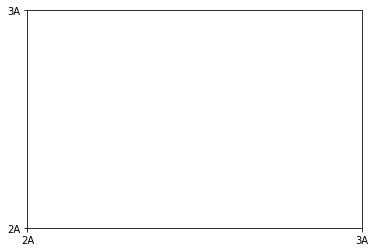

In [431]:
class_names=['2A', '3A'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

Text(0.5, 15.0, 'Predicted label')

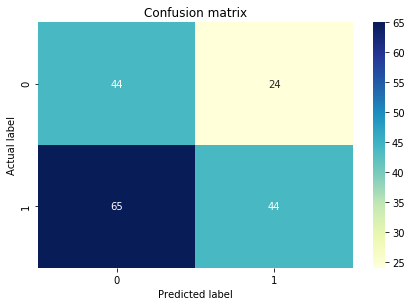

In [432]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [433]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred=new_predictions))
print("Precision:",metrics.precision_score(y_test, y_pred=new_predictions, pos_label='2A'))
print("Recall:",metrics.recall_score(y_test, y_pred=new_predictions, pos_label='2A'))

Accuracy: 0.4971751412429379
Precision: 0.4036697247706422
Recall: 0.6470588235294118


In [440]:
y_test.shape

(177,)

In [437]:
y_balanced.shape

(482,)

In [439]:
new_predictions.shape

(177,)

In [438]:
normalised_test_df.shape

(177, 8)

In [442]:
#
y_pred_proba = log_reg.predict_proba(new_predictions)[::,1], pos_label='2A'
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ValueError: could not convert string to float: '3A'

In [443]:
#Accuracy.py  It is a commonly used metric suitable when the target classes are not imbalanced.
#it is important to not use only the accuracy metric because it does not provide enough information about the model.
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print('Accuracy: {}'.format(round(accuracy*100), 2)) #prints 53.0


Accuracy: 50.0


In [444]:
y_test.shape

(177,)

In [445]:
new_predictions.shape

(177,)

In [446]:
#Cross-validation and accuracy.py applied to avoid overfitting and enable generalization.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, normalised_train_df, y_balanced, cv=5, scoring='f1_macro')

In [447]:
scores       #prints array([0.55594592, 0.4733312 , 0.55651249, 0.5245098 , 0.58315241])

array([0.44124424, 0.470626  , 0.52957265, 0.4965035 , 0.5826087 ])

In [448]:
#F1-Score.py
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

F1: 50.0


In [449]:
model = LogisticRegression().fit(x_train, y_train)
  #save result to list
f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test),pos_label='2A')*100)

In [450]:
y_test.shape

(177,)

In [452]:
new_predictions.shape

(177,)

Accuracy, precision, recall, F1-score and many others are evaluation metrics used in measuring the performance of classification models.

In [453]:
#Precision.py
#Precision: Precision is about being precise, i.e., how accurate your model is. 
#In other words, you can say, when a model makes a prediction, how often it is correct.
#In your prediction case, when your Logistic Regression model predicted patients are going 
#to suffer from diabetes, that patients have 76% of the time.

precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')

print('Precision: {}'.format(round(precision*100), 2)) #prints 41.0

Precision: 40.0


In [454]:
# Recall.py
#Recall: If there are patients who have diabetes in the test set and your 
#Logistic Regression model can identify it 58% of the time.

recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('Recall: {}'.format(round(recall*100), 2)) #prints 51.0 

Recall: 65.0


In [455]:
# K-Fold Cross Validation.py
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.split(normalised_train_df) 
f1_scores = []
#run for every split
for train_index, test_index in kf.split(normalised_train_df):
    
    x_train, x_test = normalised_train_df.iloc[train_index],normalised_train_df.iloc[test_index]
    
    y_train, y_test = y_balanced[train_index],y_balanced[test_index]
    model = LogisticRegression().fit(x_train, y_train)
  #save result to list
    f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), 
                   pos_label='2A')*100)

In [456]:
f1_scores

[46.42857142857142,
 52.0,
 50.909090909090914,
 50.84745762711865,
 52.83018867924528,
 54.23728813559322,
 56.666666666666664,
 50.847457627118644,
 24.390243902439025,
 0.0]

In [197]:
#Leave One Out Cross Validation (LOOCV).py
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(), normalised_train_df, y_balanced, cv=loo,
                         scoring='f1_macro')
average_score = scores.mean() * 100

In [457]:
#Stratified K-Fold Cross Validation.py  avoid imbalance and biased results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
f1_scores = []
#run for every split
for train_index, test_index in skf.split(normalised_train_df, y_balanced):
    
    x_train, x_test = np.array(normalised_train_df)[train_index],np.array(normalised_train_df)[test_index]
    y_train, y_test  = y_balanced[train_index],y_balanced[test_index]
    model = LogisticRegression().fit(x_train, y_train)
  #save result to list
    f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label='2A')*100)

In [458]:
 f1_scores

[43.13725490196078,
 46.15384615384615,
 55.55555555555556,
 35.55555555555556,
 67.79661016949152,
 63.1578947368421,
 52.830188679245296,
 70.17543859649123,
 55.55555555555556,
 58.620689655172406]

In [463]:
def Average(lst): 
    return sum(lst) / len(lst) 

In [464]:
Average(f1_scores)

54.85385895597161

Multilabel and Multiclass classification
a multiclass classification task will only give a single class as the result. 
In contrast, multilabel classification classifies an instance into a set of target label
The Sigmoid and the Softmax functions.
It is used for multiclass classification because it can obtain the probabilities for various classes
the sum of the outputs of the softmax must be 1, this is not the same for the sigmoid function.


In [ ]:
#Tree-Based Methods and The Support Vector Machine.py
#Support Vector Machine (SVM)  is a supervised machine learning algorithm that is used
#to solve both classification and regression tasks.

from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(normalised_train_df, y_balanced)

Tree-Based Methods and The Support Vector Machine it can be used to
classify a non-linear dataset by transforming the dataset to a higher dimensional feature
space where it can be linearly separable. This is done using the kernel trick such that a
kernel function is applied on each data point to map to a higher dimensional spa

In [ ]:
Maximum Likelihood Estimation Vs. Least Square Method